In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay

In [4]:
social_welfare_by_num_consumers = []
average_ending_producer_utility_by_num_consumers = []
average_ending_consumer_utility_by_num_consumers = []
for num_consumers in range(1, 20):
    content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

    producer_colors = []
    consumer_colors = []

    for i in range(num_producers):
        #func = lambda x: exponential_decay(x, 1)
        # func = lambda x: 1.0
        func = lambda x: inverse_decay(x, 1, 2)
        producer = Producer(i, content_market.sample_topic(), func)
        content_market.add_producer(producer)
        
        color = np.random.rand(3,)
        producer_colors.append(color)

    for i in range(num_consumers):
        #func = lambda x: exponential_decay(x, 1)
        #func = lambda x : 1.0
        func = lambda x: inverse_decay(x, 1, 2)
        consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
        content_market.add_consumer(consumer)

        color = np.random.rand(3,)
        consumer_colors.append(color)

    consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)
    social_welfare_by_num_consumers.append(total_stats['social_welfare'])
    average_ending_producer_utility_by_num_consumers.append(average_stats['producer_utilities'][-1])
    average_ending_consumer_utility_by_num_consumers.append(average_stats['consumer_utilities'][-1])

print(social_welfare_by_num_consumers)

Iteration 0 / 100 done.
Total Social Welfare: 0.14625749409912953
Iteration 1 / 100 done.
Total Social Welfare: 0.16065352069470096
Consumer rate change: 0.0
Consumer utility change: 0.014396026595571446
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 0.309595189423494
Iteration 1 / 100 done.
Total Social Welfare: 0.34906189238486024
Consumer rate change: 0.0
Consumer utility change: 0.019733351480683087
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 1.3395938593471435
Iteration 1 / 100 done.
Total Social Welfare: 1.3808205204832316
Consumer rate change: 0.0
Consumer utility change: 0.013742220378696018
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 1.7147002928445323
Iteration 1 / 100 done.
Total Social Welfare: 1.7548956130056808
Consumer rate change: 0.0
Consumer utility change: 0.01004883

In [5]:
import matplotlib.pyplot as plt

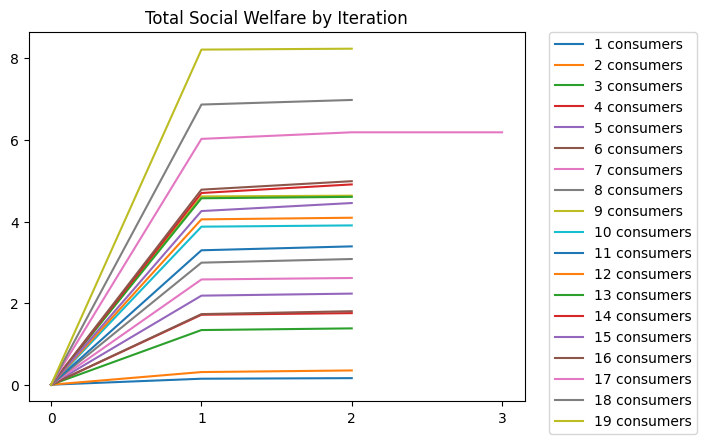

In [6]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
for i in range(len(social_welfare_by_num_consumers)):
    plt.plot(social_welfare_by_num_consumers[i], label=str(i+1) + " consumers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(max(len(x) for x in social_welfare_by_num_consumers)))
plt.show()

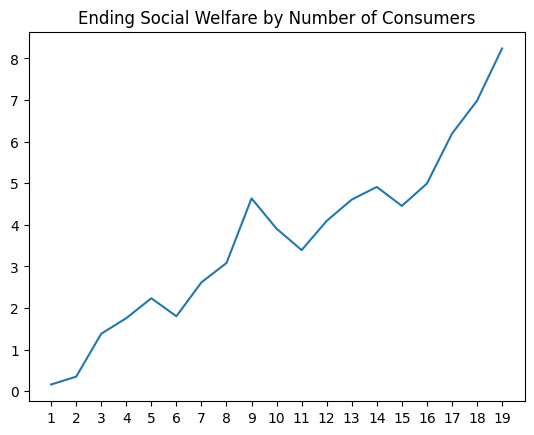

In [7]:
plt.figure()
plt.title("Ending Social Welfare by Number of Consumers")
ending_welfare = [x[-1] for x in social_welfare_by_num_consumers]
plt.plot(range(1, 20), ending_welfare)
plt.xticks(range(1, 20))
plt.show()

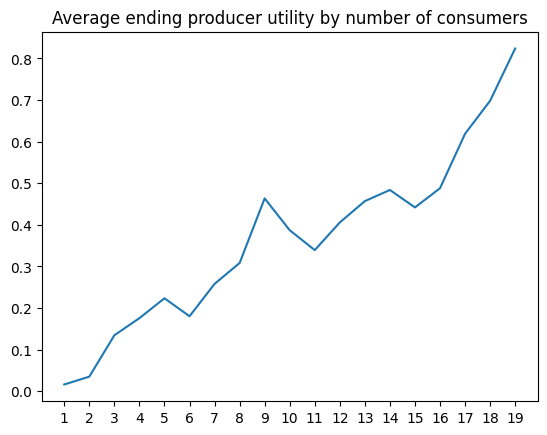

In [8]:
plt.figure()
plt.title("Average ending producer utility by number of consumers")
plt.plot(range(1, 20), average_ending_producer_utility_by_num_consumers)
plt.xticks(range(1, 20))
plt.show()

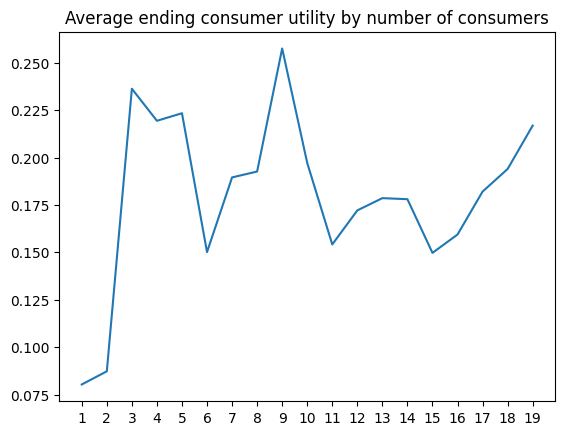

In [9]:
plt.figure()
plt.title("Average ending consumer utility by number of consumers")
plt.plot(range(1, 20), average_ending_consumer_utility_by_num_consumers)
plt.xticks(range(1, 20))
plt.show()